In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import importlib
import pickle
import sys
import os
import re
import seaborn as sns
import dataset_param as dtpar
sys.path.append('../')
import catrace.exp_collection as ecl
import catrace.process_time_trace as ptt
import catrace.plot_trace as pltr

In [2]:
dfovf_file = os.path.join(dtpar.db_dir, 'all_dfovf_select.pkl')
dfovf_df = pd.read_pickle(dfovf_file)

In [16]:
def plot_selected_trace_avg(key, level, ax=None):
    sub_dfovf = dfovf_df.xs(key, level=level, axis=1)
    sub_dfovf = ptt.unstack_pattern(sub_dfovf)
    pltr.plot_trace_avg(sub_dfovf, dtpar.frame_rate, odor_list=dtpar.odor_list, ax=ax)

In [25]:
fish_id_list = dfovf_df.columns.get_level_values('fish_id').unique()
fish_id_list = [fi for fi in fish_id_list if not re.match('.*-N(\d+)$', fi)]
fish_id_list

['2021-02-05-DpOBEM-JH9',
 '2021-03-18-DpOBEM-JH10',
 '2021-03-19-DpOBEM-JH10',
 '2021-04-02-DpOBEM-JH11',
 '2021-04-03-DpOBEM-JH11',
 '2021-05-01-DpOBEM-JH13',
 '2021-05-22-DpOBEM-JH14',
 '2021-07-30-DpOBEM-JH17',
 '2021-07-31-DpOBEM-JH17',
 '2021-09-02-DpOBEM-JH18',
 '2021-09-03-DpOBEM-JH18',
 '2021-09-04-DpOBEM-JH18',
 '2021-09-15-DpOBEM-JH20',
 '2021-09-17-DpOBEM-JH20',
 '2021-09-18-DpOBEM-JH20',
 '2021-09-29-DpOBEM-JH21',
 '2021-10-01-DpOBEM-JH21',
 '2021-10-02-DpOBEM-JH21',
 '2021-11-10-DpOBEM-JH23',
 '2021-11-14-DpOBEM-JH23',
 '2021-11-24-DpOBEM-JH24',
 '2021-11-27-DpOBEM-JH24',
 '2021-11-26-DpOBEM-JH24']

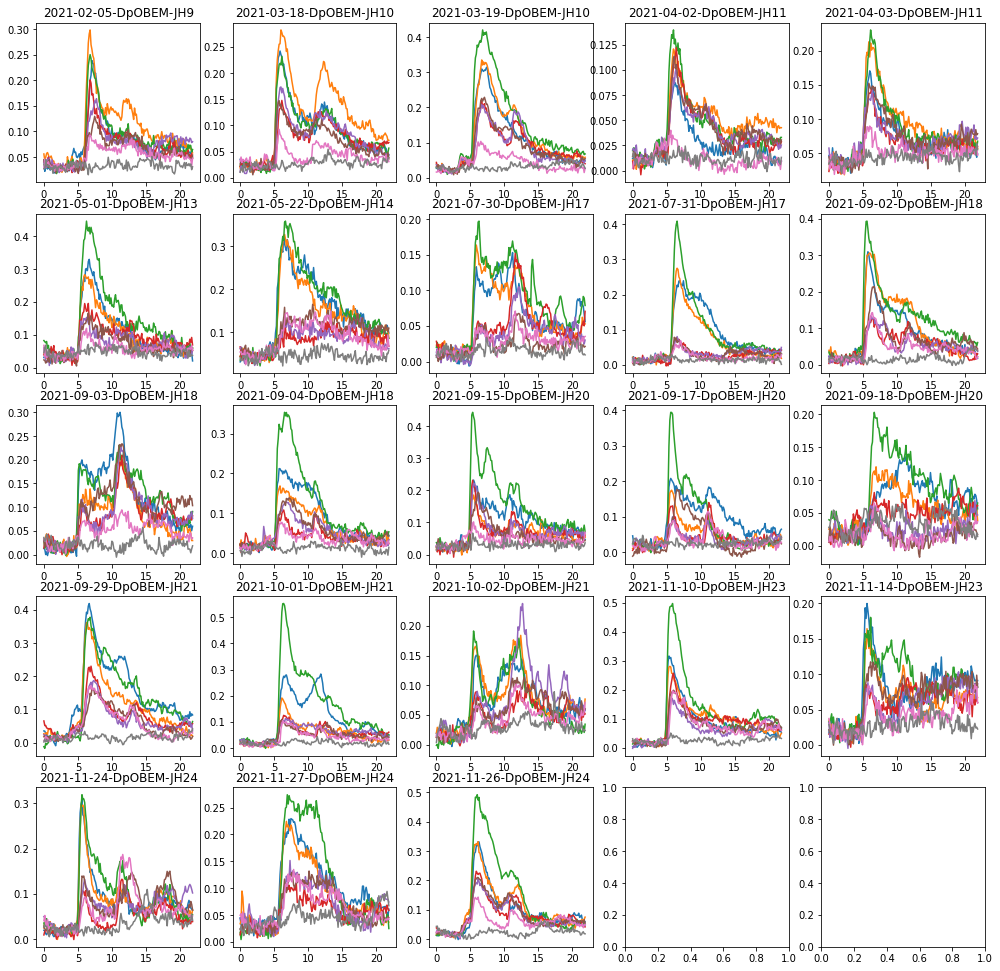

In [26]:
region = 'Dp'
ncol = 5
nrow = int(np.ceil(len(fish_id_list) / ncol))
figsize=[17, 3.4*nrow]
fig, axes = plt.subplots(nrow, ncol, figsize=figsize)
for idx, fish_id in enumerate(fish_id_list):
    ax = axes.flatten()[idx]
    plot_selected_trace_avg((fish_id, region), ('fish_id', 'region'), ax=ax)
    ax.title.set_text(fish_id)

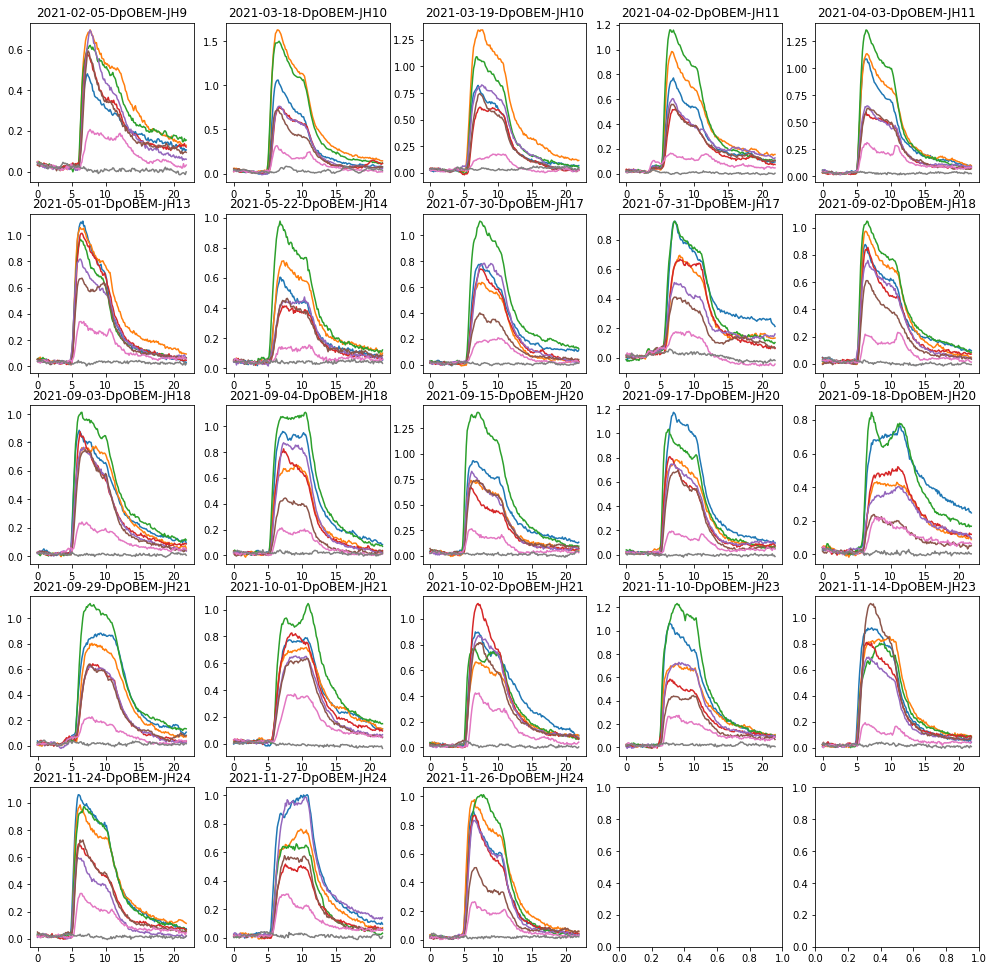

In [27]:
region = 'OB'
ncol = 5
nrow = int(np.ceil(len(fish_id_list) / ncol))
figsize=[17, 3.4*nrow]
fig, axes = plt.subplots(nrow, ncol, figsize=figsize)
for idx, fish_id in enumerate(fish_id_list):
    ax = axes.flatten()[idx]
    plot_selected_trace_avg((fish_id, region), ('fish_id', 'region'), ax=ax)
    ax.title.set_text(fish_id)

In [35]:
def plot_each_fish(plot_func, region):
    ncol = 5
    nrow = int(np.ceil(len(fish_id_list) / ncol))
    figsize=[17, 3.4*nrow]
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize)
    for idx, fish_id in enumerate(fish_id_list):
        ax = axes.flatten()[idx]
        plot_func((region, fish_id), ('region', 'fish_id'), ax=ax)
        ax.title.set_text(fish_id)

In [37]:
importlib.reload(ecl)
time_window_dict = {'Dp': [5.5,7.5], 'OB':[5.5,11]}
def plot_selected_pattern_corrmat(key, level, ax=None):
    sub_dfovf = dfovf_df.xs(key, level=level, axis=1)
    sub_dfovf = ptt.unstack_pattern(sub_dfovf)
    if isinstance(key, str):
        region=key
    else:
        region=key[0]
    ecl.plot_exp_pattern_correlation(sub_dfovf, dtpar.odor_list, dtpar.frame_rate, time_window=time_window_dict[region], ax=ax)

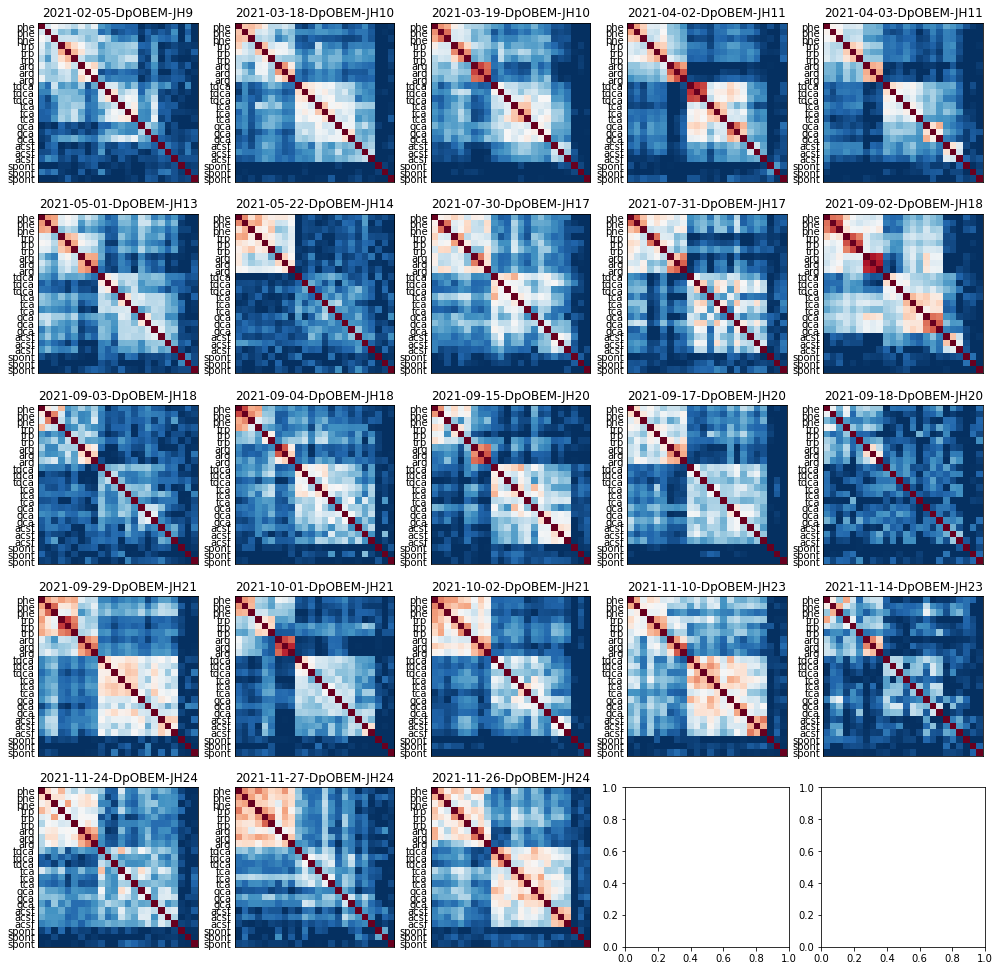

In [38]:
plot_each_fish(plot_selected_pattern_corrmat, region='Dp')

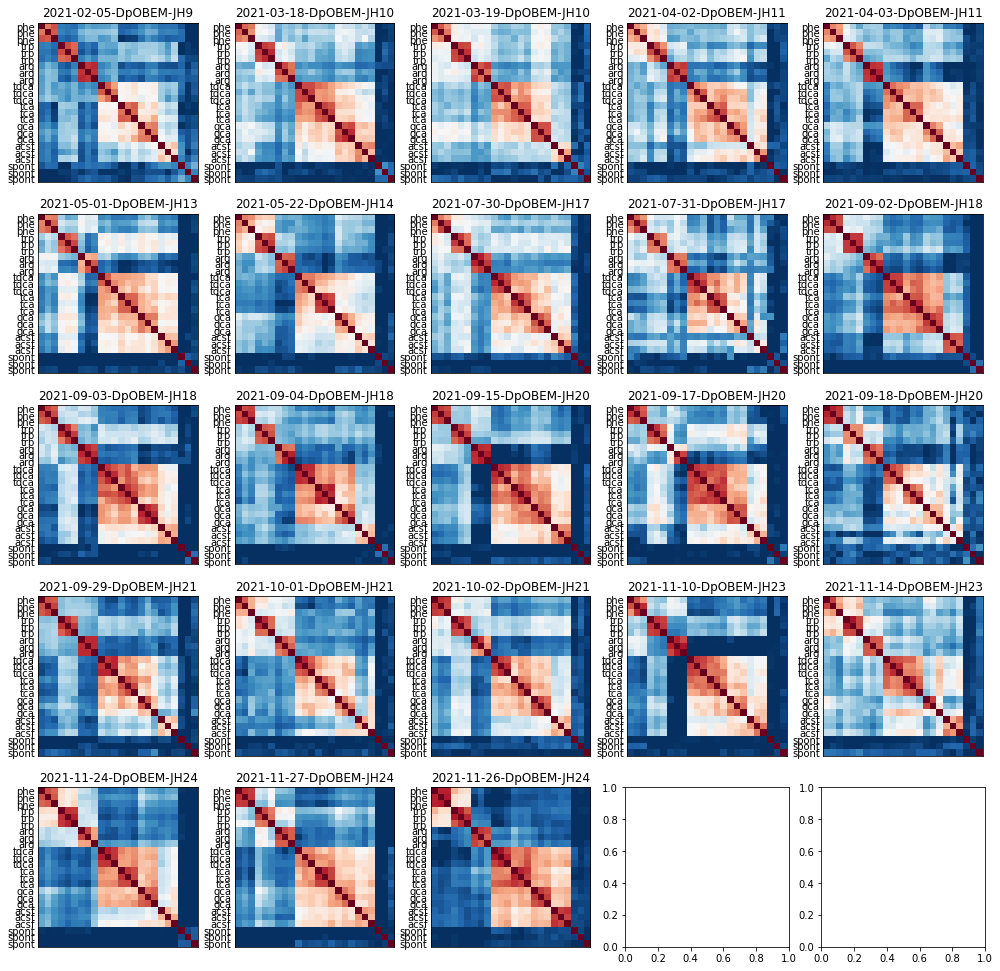

In [39]:
plot_each_fish(plot_selected_pattern_corrmat, region='OB')

In [52]:
def print_cell_number(region):
    print(region)
    for fish_id in fish_id_list:
        key = (region, fish_id)
        level = ('region', 'fish_id')
        sub_dfovf = dfovf_df.xs(key, level=level, axis=1)
        print(fish_id, len(sub_dfovf.columns))

In [53]:
print_cell_number('Dp')

Dp
2021-02-05-DpOBEM-JH9 652
2021-03-18-DpOBEM-JH10 867
2021-03-19-DpOBEM-JH10 890
2021-04-02-DpOBEM-JH11 569
2021-04-03-DpOBEM-JH11 545
2021-05-01-DpOBEM-JH13 361
2021-05-22-DpOBEM-JH14 401
2021-07-30-DpOBEM-JH17 432
2021-07-31-DpOBEM-JH17 452
2021-09-02-DpOBEM-JH18 501
2021-09-03-DpOBEM-JH18 290
2021-09-04-DpOBEM-JH18 576
2021-09-15-DpOBEM-JH20 350
2021-09-17-DpOBEM-JH20 438
2021-09-18-DpOBEM-JH20 375
2021-09-29-DpOBEM-JH21 656
2021-10-01-DpOBEM-JH21 632
2021-10-02-DpOBEM-JH21 543
2021-11-10-DpOBEM-JH23 575
2021-11-14-DpOBEM-JH23 281
2021-11-24-DpOBEM-JH24 424
2021-11-27-DpOBEM-JH24 479
2021-11-26-DpOBEM-JH24 735


In [55]:
print_cell_number('OB')

OB
2021-02-05-DpOBEM-JH9 1083
2021-03-18-DpOBEM-JH10 1486
2021-03-19-DpOBEM-JH10 1048
2021-04-02-DpOBEM-JH11 1404
2021-04-03-DpOBEM-JH11 1643
2021-05-01-DpOBEM-JH13 1229
2021-05-22-DpOBEM-JH14 841
2021-07-30-DpOBEM-JH17 963
2021-07-31-DpOBEM-JH17 711
2021-09-02-DpOBEM-JH18 924
2021-09-03-DpOBEM-JH18 816
2021-09-04-DpOBEM-JH18 793
2021-09-15-DpOBEM-JH20 811
2021-09-17-DpOBEM-JH20 797
2021-09-18-DpOBEM-JH20 679
2021-09-29-DpOBEM-JH21 798
2021-10-01-DpOBEM-JH21 901
2021-10-02-DpOBEM-JH21 897
2021-11-10-DpOBEM-JH23 660
2021-11-14-DpOBEM-JH23 835
2021-11-24-DpOBEM-JH24 831
2021-11-27-DpOBEM-JH24 712
2021-11-26-DpOBEM-JH24 954


/home/hubo/.local/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


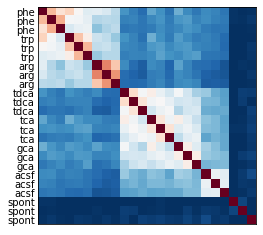

In [10]:
plot_selected_pattern_corrmat('Dp', 'region')

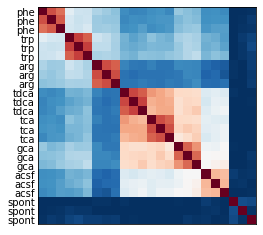

In [11]:
plot_selected_pattern_corrmat('OB', 'region')

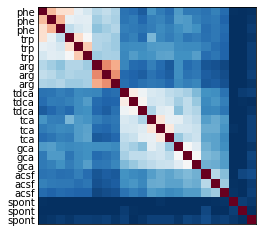

In [12]:
plot_selected_pattern_corrmat(('Dp','phe-arg'), ('region','cond'))

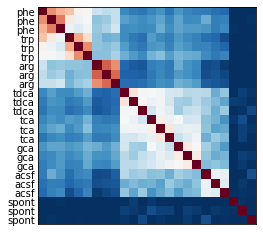

In [13]:
plot_selected_pattern_corrmat(('Dp','arg-phe'), ('region','cond'))

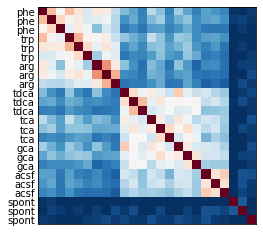

In [14]:
plot_selected_pattern_corrmat(('Dp','phe-trp'), ('region','cond'))

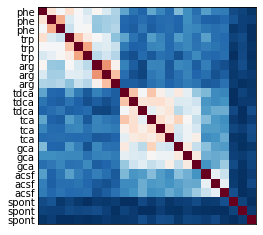

In [15]:
plot_selected_pattern_corrmat(('Dp','naive'), ('region','cond'))

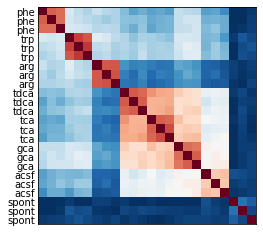

In [16]:
plot_selected_pattern_corrmat(('OB','phe-arg'), ('region','cond'))

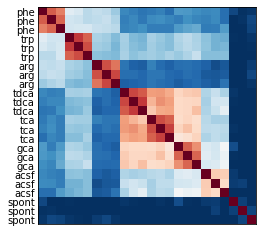

In [17]:
plot_selected_pattern_corrmat(('OB','arg-phe'), ('region','cond'))

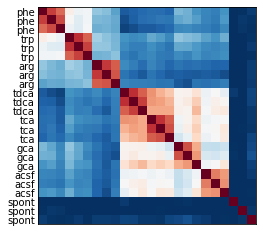

In [18]:
plot_selected_pattern_corrmat(('OB','phe-trp'), ('region','cond'))

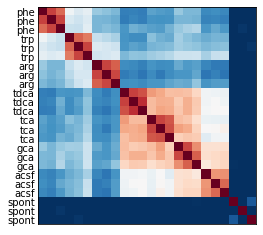

In [19]:
plot_selected_pattern_corrmat(('OB','naive'), ('region','cond'))

In [41]:
dtpar.odor_list

['phe', 'trp', 'arg', 'tdca', 'tca', 'gca', 'acsf', 'spont']

In [37]:
len('Dp')

2